In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns=999
pd.options.display.max_rows=999


import plotly.express as px
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

In [2]:
df        = pd.read_csv('../data/SIHSUS/sihsus_estabelecimento.csv')

hospitais = pd.read_csv('../data/Codigos/gmaps_cnes_hospital.csv')
# hospitais = hospitais.rename(columns={'hospital':'co_cnes'})

In [3]:
df['hospital'] = df['Estabelecimento'].apply(lambda x: x[8:]).str.strip()
df['co_cnes'] = pd.to_numeric(df['Estabelecimento'].apply(lambda x: x[:8]).str.strip(), errors='coerce')
df['Data'] = pd.to_datetime(df['ano'].astype(str) + "-" + df['mes'].astype(str))

mask = df['Estabelecimento']!='Total'

df = df[mask]

In [4]:
cols = ['co_cnes','lat','lng','administrative_area_level_2']
df_hospitais = pd.merge(hospitais[cols], df, on='co_cnes', how='right')
# df_hospitais = pd.merge(municipios, df_hospitais, how='right', left_on='geocodigo',right_on='co_ibge')


In [5]:
ano = 2019
mes = 9

mask = (df_hospitais['ano']==ano) & (df_hospitais['mes']==mes) & (df_hospitais['lat'].notnull())

hospitais_assis = df_hospitais[mask]


locations = hospitais_assis[['lat', 'lng']]
locationlist = locations.values.tolist()

In [7]:
map2 = folium.Map(location=[-22.157651, -48.054817], zoom_start=7, tiles='CartoDB dark_matter')

marker_cluster = MarkerCluster().add_to(map2)


variavel = 'AIH aprovadas'

hospitais_assis['var'] = pd.to_numeric(hospitais_assis[variavel], errors='coerce').fillna(1)


variable = hospitais_assis[variavel].tolist()
var      = hospitais_assis['var'].tolist()
hospitais = hospitais_assis['hospital'].tolist()
municipio = hospitais_assis['administrative_area_level_2'].tolist()


factor = 30/max(var)

for i in range(0, len(locationlist)):
    string = "Municipio: " + str(municipio[i]) +  '<br>' '<br>'+ str(hospitais[i]) +  '<br>' '<br>'+ str(variavel) + ": " + str(variable[i])
#     print(string)
#     
    folium.Marker(locationlist[i], popup=(string),).add_to(marker_cluster)
    
#     folium.CircleMarker(location=locationlist[i],
#                             radius= var[i] * factor,
#                             color="#007849",
#                             popup=string,
#                             fill=False).add_to(map2)
#     print(var[i])

# HeatMap(data=hospitais_assis[['lat','lng','var']].values.tolist(), radius=20, max_zoom=13).add_to(map2)

    
map2

/home/m/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/home/m/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



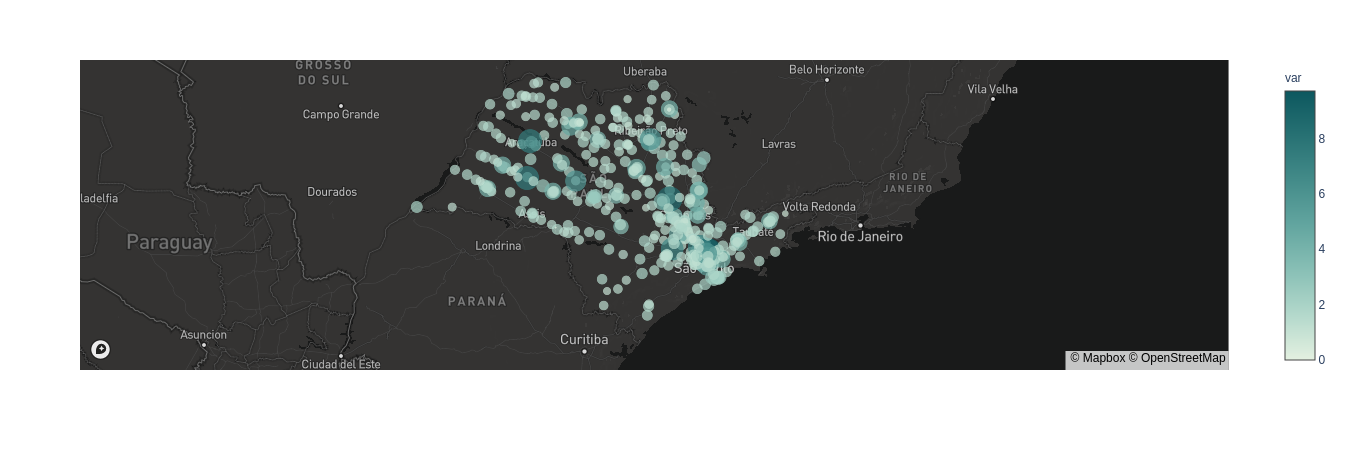

In [179]:


import plotly.express as px
token = open("../../mapbox_token").read()

variavel = 'Média permanência'

hospitais_assis['var'] = np.log(pd.to_numeric(hospitais_assis[variavel], errors='coerce').fillna(0) +1 )

dd="var"
fig = px.scatter_mapbox(hospitais_assis, lat="lat", lon="lng", color="var", size="var", hover_name='hospital',
                        color_continuous_scale=px.colors.carto.Mint, size_max=20, zoom=5)

fig.update_layout(mapbox_style="dark", mapbox_accesstoken=token)
fig.show()



### Graphs

In [9]:
from ipywidgets import interact

In [10]:
df_hospitais.columns

Index(['co_cnes', 'lat', 'lng', 'administrative_area_level_2',
       'Estabelecimento', 'AIH aprovadas', 'Internações', 'Valor total',
       'Valor serviços hospitalares', 'Val serv hosp - compl federal',
       'Val serv hosp - compl gestor', 'Valor serviços profissionais',
       'Val serv prof - compl federal', 'Val serv prof - compl gestor',
       'Valor médio AIH', 'Valor médio intern', 'Dias permanência',
       'Média permanência', 'Óbitos', 'Taxa mortalidade', 'ano', 'mes',
       'hospital', 'Data'],
      dtype='object')

In [175]:
cidades = df_hospitais['administrative_area_level_2'].unique().tolist()
variaveis = ['AIH aprovadas', 'Internações', 'Valor total',
       'Valor serviços hospitalares', 'Val serv hosp - compl federal',
       'Val serv hosp - compl gestor', 'Valor serviços profissionais',
       'Val serv prof - compl federal', 'Val serv prof - compl gestor',
       'Valor médio AIH', 'Valor médio intern', 'Dias permanência',
       'Média permanência', 'Óbitos', 'Taxa mortalidade']

In [176]:
df_hospitais_norm = df_hospitais.copy()
mask = df_hospitais_norm['administrative_area_level_2']=='Taubaté'
df_hospitais_norm = df_hospitais_norm[mask]

hospitais = df_hospitais_norm['hospital'].unique().tolist()


df_hospital_norm = pd.DataFrame()

for hospital in hospitais:
    mask = df_hospitais_norm['hospital']==hospital
    df_hospital = df_hospitais_norm[mask]

    for col in variaveis:
        df_hospital[col] = pd.to_numeric(df_hospital[col], errors='coerce')
        df_hospital[col]= (df_hospital[col]-df_hospital[col].min())/(df_hospital[col].max()-df_hospital[col].min())
    
    df_hospital_norm = pd.concat([df_hospital_norm,df_hospital],axis=0)
    
    
n_hospitais = len(hospitais)

/home/m/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/m/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



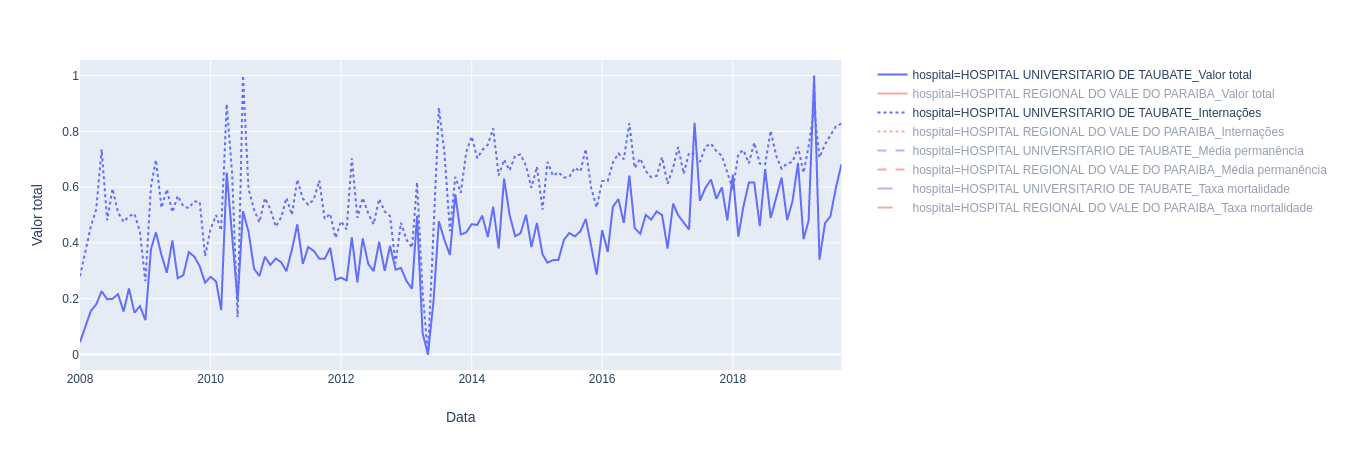

In [177]:
var = 'Valor total'
df_plot = df_hospital_norm.copy()
df_plot['hospital'] = df_plot['hospital'] + "_" + var
fig  = px.line(df_plot, x = 'Data', y=var, color='hospital')

mult_vars = ['Internações','Média permanência','Taxa mortalidade']

# dash_list = ["solid","dot","dash","longdash","dashdot","longdashdot"]
dash_list = ["dot","dash","longdash"]

for var,dash in zip(mult_vars,dash_list):
    df_plot = df_hospital_norm.copy()
    df_plot['hospital'] = df_plot['hospital'] + "_" + var
    
    fig2  = px.line(df_plot, x = 'Data', y=var, color='hospital', line_dash_sequence=[dash for i in range(n_hospitais)])
    
    for i in range(n_hospitais):
        fig.add_trace(fig2.data[i])

fig.show()

### Cluester Analysis

In [109]:
variaveis = ['AIH aprovadas', 'Internações', 'Valor total',
       'Valor serviços hospitalares', 'Val serv hosp - compl federal',
       'Val serv hosp - compl gestor', 'Valor serviços profissionais',
       'Val serv prof - compl federal', 'Val serv prof - compl gestor',
       'Valor médio AIH', 'Valor médio intern', 'Dias permanência',
       'Média permanência', 'Óbitos', 'Taxa mortalidade']

In [142]:
df_hospitais_ano = df_hospitais.copy()
for col in variaveis:
    df_hospitais_ano[col] = pd.to_numeric(df_hospitais_ano[col], errors='coerce')


df_hospitais_ano_g = df_hospitais_ano.groupby(by=['hospital','ano','lat','lng','co_cnes'], as_index=False).sum()
df_hospitais_ano_g['ano'] = df_hospitais_ano_g['ano'].astype(str)

In [143]:
df_hospitais_ano_g['folha_x_servicos'] = df_hospitais_ano_g['Valor serviços profissionais']/df_hospitais_ano_g['Valor total']

In [158]:
df_hospitais_ano_g['media_permanencia'] = df_hospitais_ano_g['Dias permanência']/df_hospitais_ano_g['Internações']

In [160]:
# df_hospitais_ano_g[['hospital','media_permanencia','Média permanência']]

In [148]:
from sklearn.cluster import KMeans


df_hospitais_ano_g['cluster'] = KMeans(n_clusters=7, random_state=42).fit_predict(df_hospitais_ano_g['Internações'].values.reshape(-1,1))
df_hospitais_ano_g['cluster'] = df_hospitais_ano_g['cluster'].astype(str)

# df_hospitais_ano_g['cluester_ano'] = df_hospitais_ano_g['ano'].astype(str) + '_' + df_hospitais_ano_g['cluester'].astype(str)

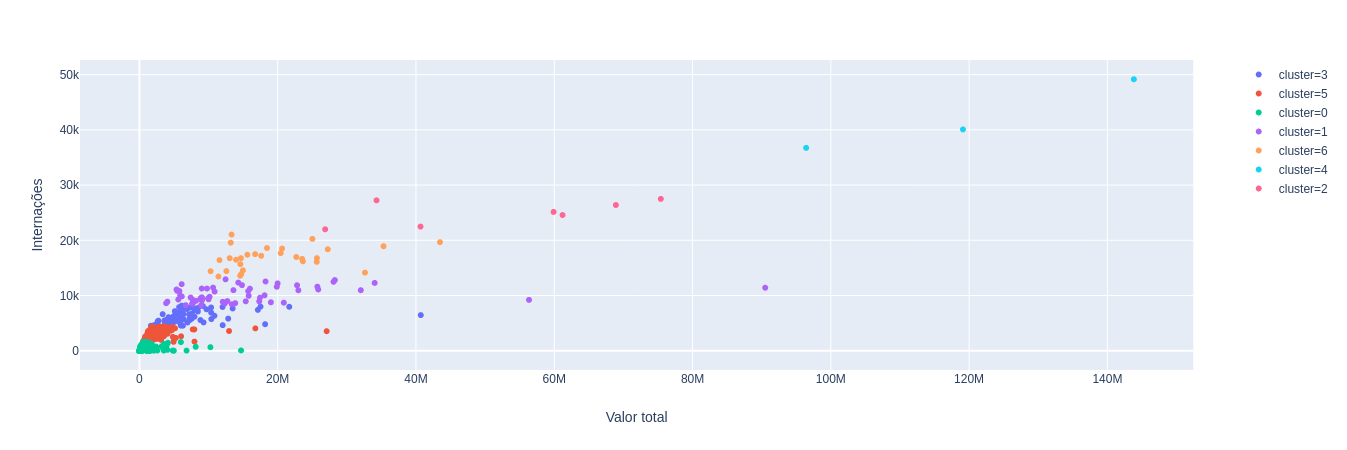

In [178]:
var1 = 'Valor total'
var2 = 'Internações'


mask = df_hospitais_ano_g['ano']=='2018'

px.scatter(df_hospitais_ano_g[mask], x = var1, y=var2,  color='cluster', hover_name='hospital')
